In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import filedialog
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
train_data_dir = "C:/Users/Sanket/OneDrive/Desktop/Child or not/train"
test_data_dir = "C:/Users/Sanket/OneDrive/Desktop/Child or not/test"
saved_model_path = "model.h5"

In [3]:
# Image dimensions
img_width, img_height = 320, 370
input_shape = (img_width, img_height, 3)

In [4]:
# Model parameters
batch_size = 32
epochs = 10

In [5]:
# Data preparation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

Found 578 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')


Found 102 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 120 images belonging to 2 classes.


In [9]:
# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Sanket\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


C:\Users\Sanket\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.4891 - loss: 3.6132 - val_accuracy: 0.5104 - val_loss: 0.6903
Epoch 2/10
 1/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4688 - loss: 0.7045

C:\Users\Sanket\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4688 - loss: 0.3718 - val_accuracy: 0.3333 - val_loss: 0.3486
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5682 - loss: 0.6914 - val_accuracy: 0.5521 - val_loss: 0.6903
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7188 - loss: 0.3029 - val_accuracy: 0.3333 - val_loss: 0.4429
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5368 - loss: 0.7545 - val_accuracy: 0.5521 - val_loss: 0.6674
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5625 - loss: 0.3520 - val_accuracy: 0.8333 - val_loss: 0.3040
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7511 - loss: 0.6040 - val_accuracy: 0.5000 - val_loss: 0.7421
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7812 - loss: 0.2899 - val_accuracy: 0.6667 - val_loss: 0.2328
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8153 - loss: 0.4286 - val_accuracy: 0.5833 - val_loss: 0.7480

In [11]:
# Save the model
model.save(saved_model_path)
print("Model saved successfully.")

Model saved successfully.


In [12]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.5924 - loss: 0.7657


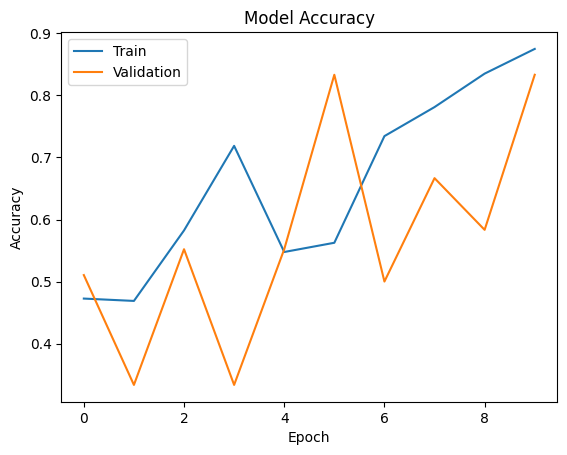

In [13]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

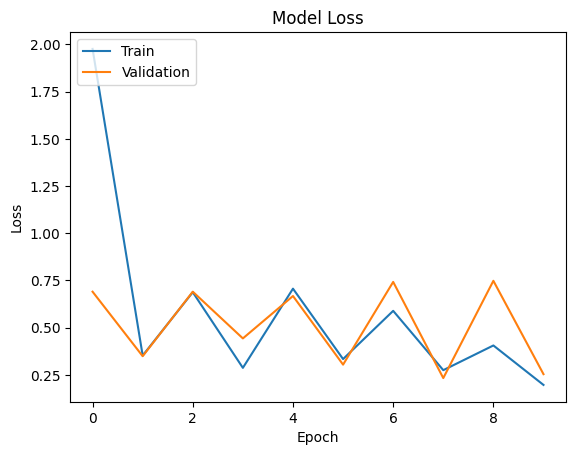

In [14]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# GUI Development
def classify_image():
    file_path = filedialog.askopenfilename()
    img_pil = Image.open(file_path)
    img_pil = img_pil.resize((img_width, img_height))  # Resize the PIL Image
    img = ImageTk.PhotoImage(img_pil)
    panel = tk.Label(root, image=img)
    panel.image = img
    panel.pack()

    # Update existing label with new image
    panel.config(image=img)
    panel.image = img
    
    # Preprocess image
    img_array = np.array(img_pil) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Load the saved model
    loaded_model = load_model(saved_model_path)
    
    # Predict
    prediction = loaded_model.predict(img_array)
    if prediction < 0.5:
        result_label.config(text="Predicted: Adult")
    else:
        result_label.config(text="Predicted: Child")


In [33]:
# Create GUI window
root = tk.Tk()
root.title("Child Classification")
root.geometry("400x450")

classify_button = tk.Button(root, text="Classify Image", command=classify_image)
classify_button.pack()

result_label = tk.Label(root, text="")
result_label.pack()

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
